### cost function 
#### we'll implement and explore cost function mathematically for simple linar regression

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [27]:
def cost_value(X,y,b,w):
    m = X.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w*X[i] + b
        cost = (f_wb - y[i])**2
        cost_sum = cost_sum + cost
    total_cost = (1/(2*m))*cost_sum

    return total_cost

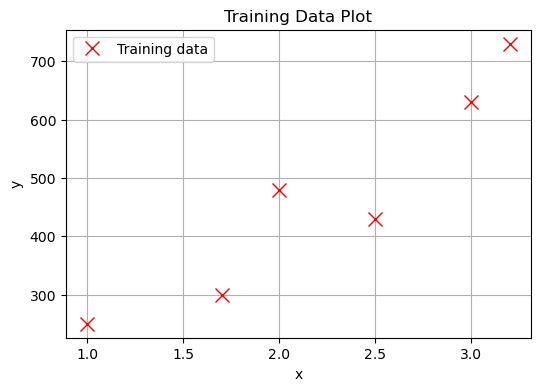

In [28]:
# Create the plot
plt.figure(figsize=(6,4))
plt.plot(x_train, y_train, 'rx', markersize=10, label="Training data")  # red X markers
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data Plot")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
# example

w = 200
b = 100
cost = cost_value(x_train, y_train, b, w)
print(f"cost: {cost}")

cost: 4700.0


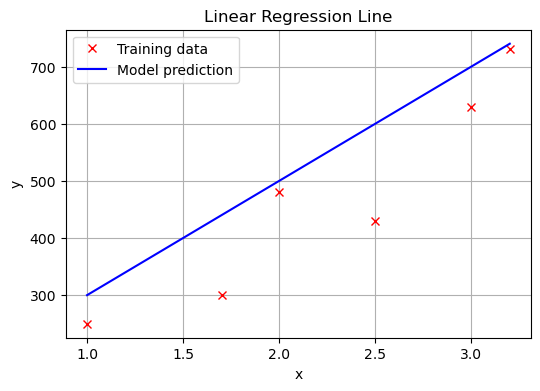

In [30]:
b = 100
w = 200

# Predict using the model
y_pred = w * x_train + b

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(x_train, y_train, 'rx', label='Training data')  # red x for data
plt.plot(x_train, y_pred, 'b-', label='Model prediction')  # blue line for prediction
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Line")
plt.legend()
plt.grid(True)
plt.show()

##### since our prediction is not that perfect so lets try to minimize our squared error cost function by choosing the best value for 'w' and 'b'

##### we want minJ(w, b) so we can use Gradient Decent Algorithm

In [34]:
def compute_gradient(X, y, b, w):
    m = X.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * X[i] + b
        error = f_wb - y[i]
        dj_dw += error * X[i]
        dj_db += error

    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


### Gradient Decent Loop

In [35]:
def gradient_descent(X, y, b_init, w_init, alpha, num_iters):
    b = b_init
    w = w_init

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, b, w)
        
        # Update parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i % 100 == 0:
            cost = cost_value(X, y, b, w)
            print(f"Iteration {i:4}: Cost {cost:.2f}, w = {w:.2f}, b = {b:.2f}")

    return b, w


Iteration    0: Cost 109412.86, w = 11.70, b = 4.70
Iteration  100: Cost 1955.33, w = 182.62, b = 67.37
Iteration  200: Cost 1919.44, w = 185.09, b = 61.92
Iteration  300: Cost 1889.53, w = 187.15, b = 56.86
Iteration  400: Cost 1864.49, w = 189.04, b = 52.23
Iteration  500: Cost 1843.53, w = 190.77, b = 47.99
Iteration  600: Cost 1825.99, w = 192.36, b = 44.11
Iteration  700: Cost 1811.31, w = 193.80, b = 40.56
Iteration  800: Cost 1799.02, w = 195.13, b = 37.32
Iteration  900: Cost 1788.73, w = 196.34, b = 34.35


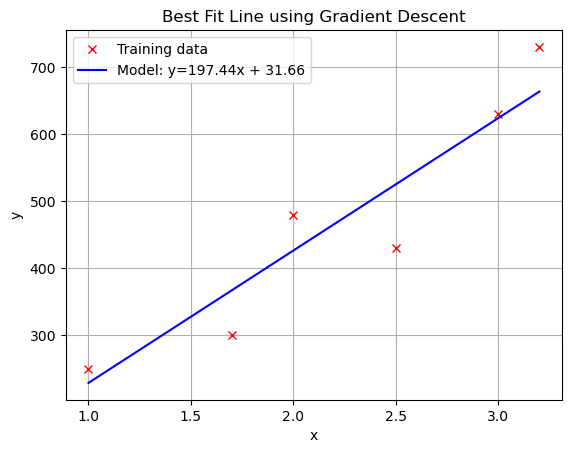

In [36]:
# Initialize
b_init = 0
w_init = 0
alpha = 0.01
iterations = 1000

# Train
b_opt, w_opt = gradient_descent(x_train, y_train, b_init, w_init, alpha, iterations)

# Predict with optimized values
y_pred = w_opt * x_train + b_opt

# Plot
plt.plot(x_train, y_train, 'rx', label='Training data')
plt.plot(x_train, y_pred, 'b-', label=f'Model: y={w_opt:.2f}x + {b_opt:.2f}')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best Fit Line using Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()
